<a href="https://colab.research.google.com/github/tunabozkir/ANN-credit-score-analysis/blob/main/CreditScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First, import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [2]:
# Read the dataset and look at the first five records
df = pd.read_csv("CreditScore.csv")
df.head()

,Unnamed: 0,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [3]:
# Look at the shape of dataset
df.shape

(4446, 15)

In [4]:
# Drop the unnecessary feature
df = df.drop(["Unnamed: 0"],axis=1)

In [5]:
# Check the dataset whether it has any NAN value(s) or not
df.isnull().sum()

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64

In [6]:
# Check my dataset whether imbalanced or not
df["Status"].value_counts() / len(df)

good    0.719073
bad     0.280927
Name: Status, dtype: float64

In [7]:
for i in df[["Status","Home","Marital","Records","Job"]]:
  print(df[i].nunique())

2
6
5
2
4


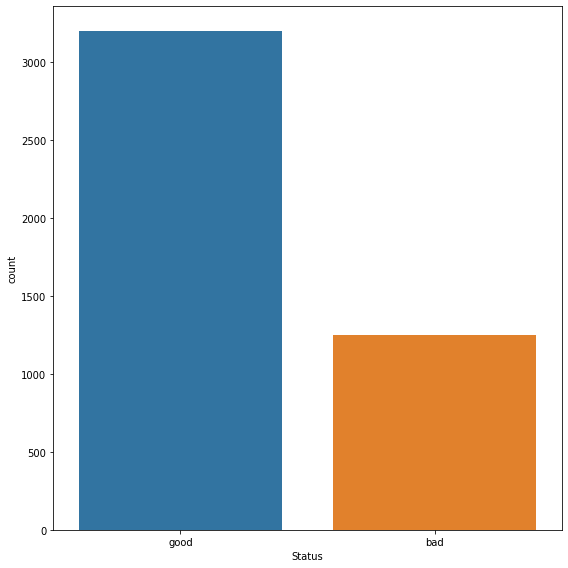

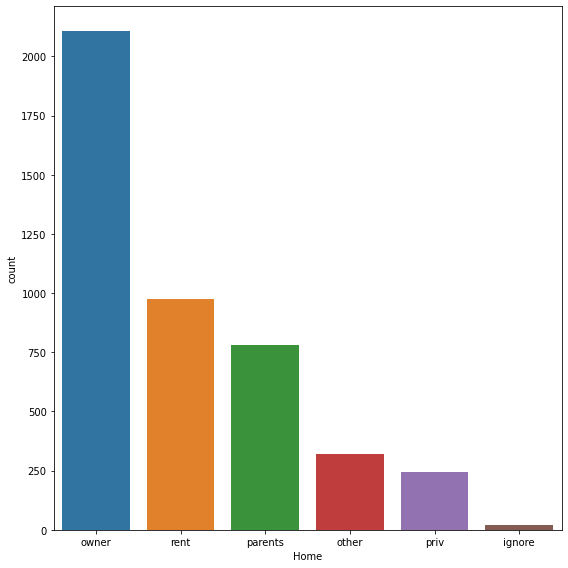

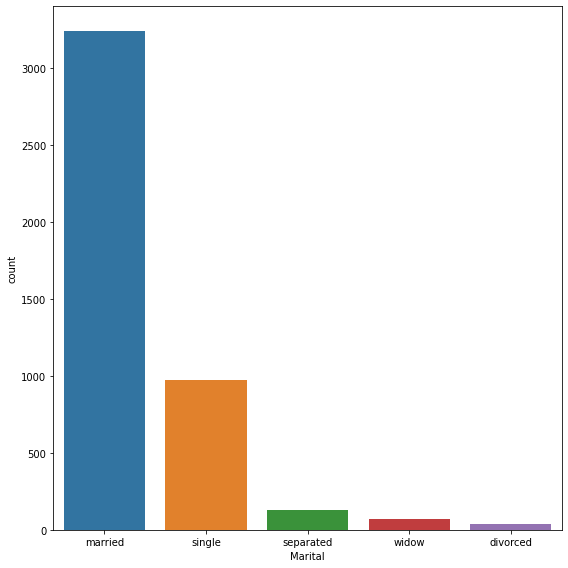

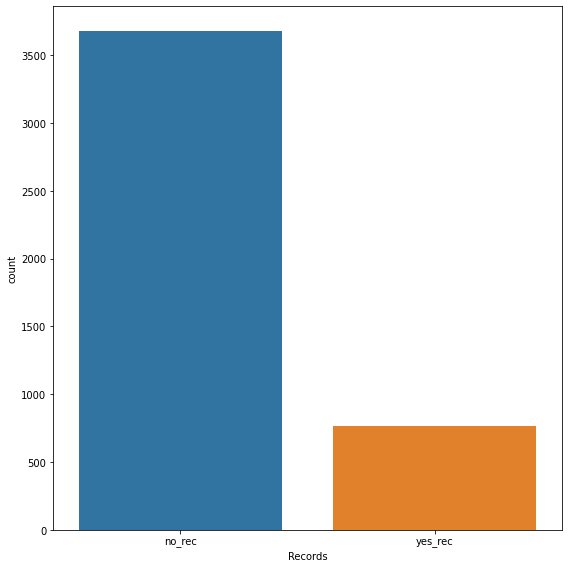

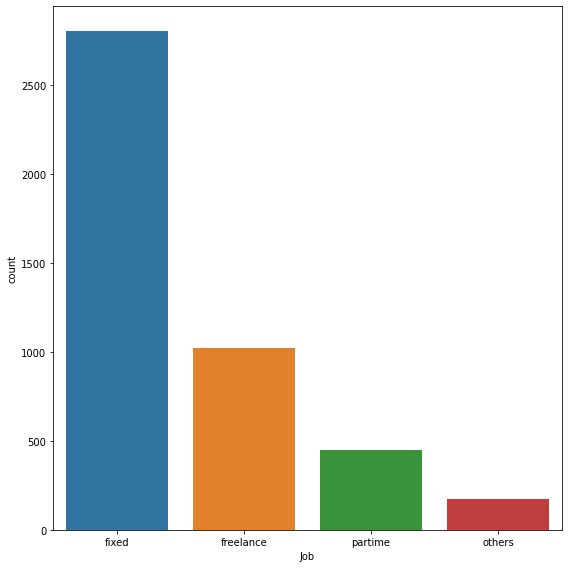

In [8]:
# Look at the count for each categorical feature
for i in df[["Status","Home","Marital","Records","Job"]]:
  plt.figure(figsize=(8,8))
  sns.countplot(df[i],order=df[i].value_counts().index);
  plt.tight_layout()

In [9]:
# Apply One Hot Encoding for Status and Records features
df["Status"] = pd.get_dummies(df["Status"],drop_first=True)
df["Records"] = pd.get_dummies(df["Records"],drop_first=True)

In [10]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,rent,60,30,married,0,freelance,73,129,0,0,800,846
1,1,17,rent,60,58,widow,0,fixed,48,131,0,0,1000,1658
2,0,10,owner,36,46,married,1,freelance,90,200,3000,0,2000,2985
3,1,0,rent,60,24,single,0,fixed,63,182,2500,0,900,1325
4,1,0,rent,36,26,single,0,fixed,46,107,0,0,310,910


In [11]:
# Apply Label Encoding for Home, Marital, and Job features
home_dict = {"owner":5,"rent":4,"parents":3,"other":2,"priv":1,"ignore":0}
df["Home"] = df["Home"].map(home_dict)
marital_dict = {"married":4,"single":3,"separated":2,"widow":1,"divorced":0}
df["Marital"] = df["Marital"].map(marital_dict)
job_dict = {"fixed":3,"freelance":2,"partime":1,"others":0}
df["Job"] = df["Job"].map(job_dict)

In [12]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,4,60,30,4,0,2,73,129,0,0,800,846
1,1,17,4,60,58,1,0,3,48,131,0,0,1000,1658
2,0,10,5,36,46,4,1,2,90,200,3000,0,2000,2985
3,1,0,4,60,24,3,0,3,63,182,2500,0,900,1325
4,1,0,4,36,26,3,0,3,46,107,0,0,310,910


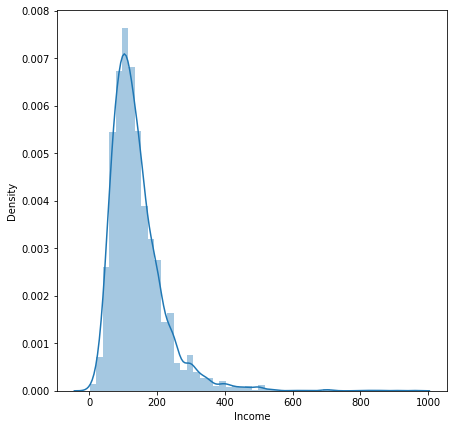

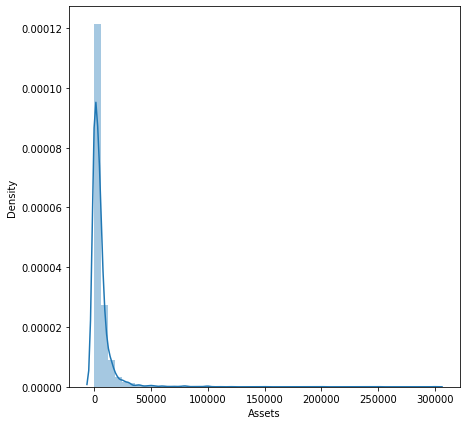

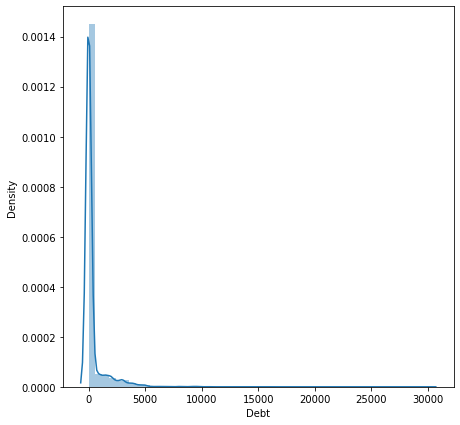

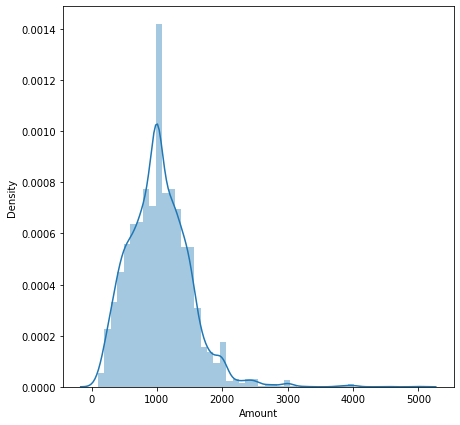

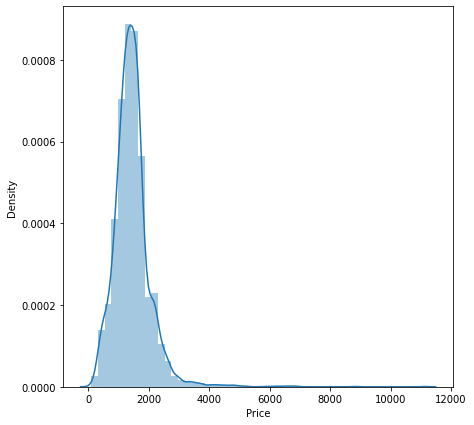

In [13]:
# Would like to see the distribution of continuous features
for i in df[["Income","Assets","Debt","Amount","Price"]]:
  plt.figure(figsize=(7,7))
  sns.distplot(df[i])

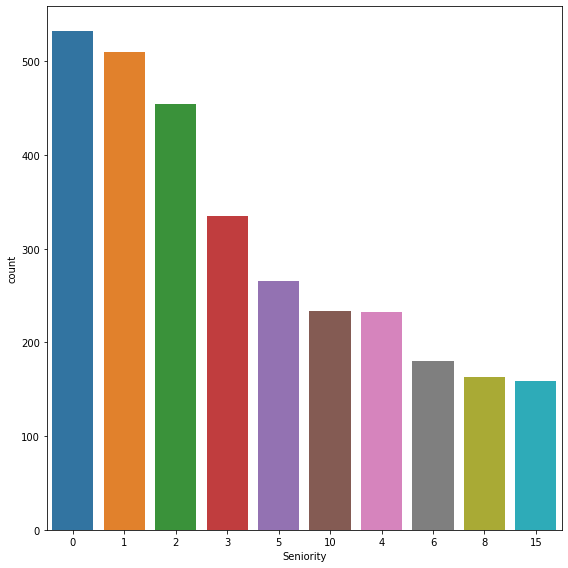

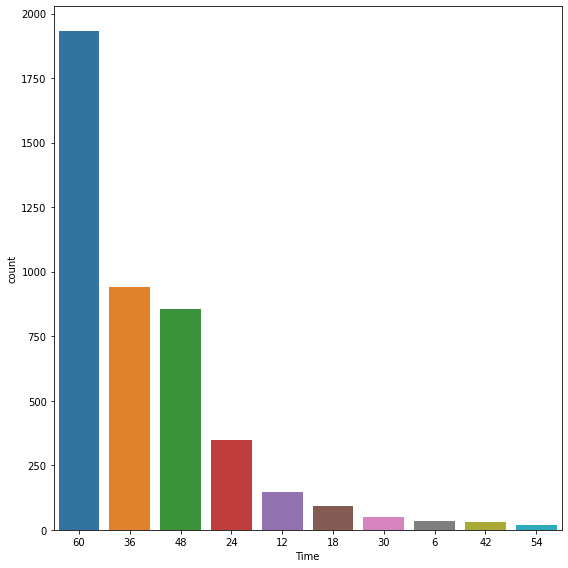

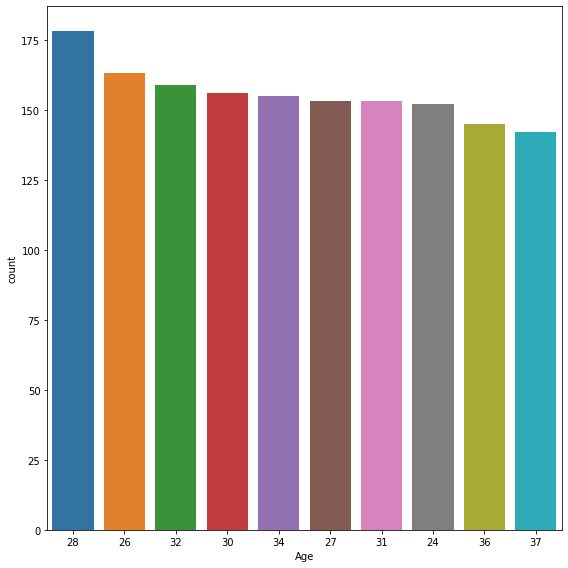

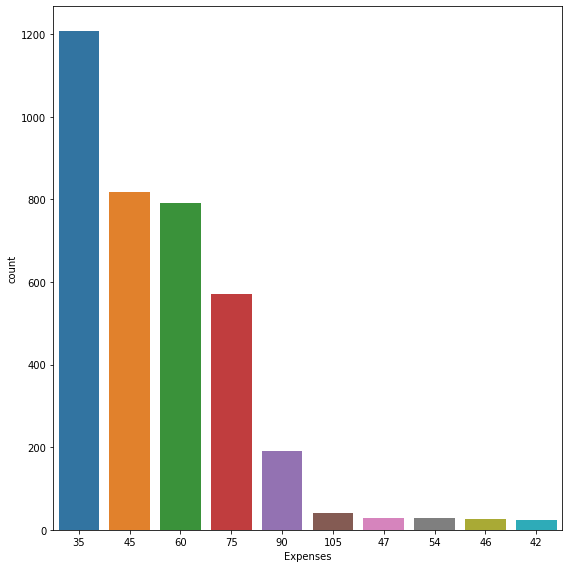

In [14]:
for i in df[["Seniority","Time","Age","Expenses"]]:
  plt.figure(figsize=(8,8))
  sns.countplot(df[i],order=df[i].value_counts().head(10).index);
  plt.tight_layout()

#### Now, my dataset is ready to implement ANN model

In [15]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,4,60,30,4,0,2,73,129,0,0,800,846
1,1,17,4,60,58,1,0,3,48,131,0,0,1000,1658
2,0,10,5,36,46,4,1,2,90,200,3000,0,2000,2985
3,1,0,4,60,24,3,0,3,63,182,2500,0,900,1325
4,1,0,4,36,26,3,0,3,46,107,0,0,310,910


In [16]:
# Identify the independent features(X) and the dependent feature(y)
X = df.drop("Status",axis=1)
y = df["Status"]

In [17]:
# Split the dataset into Training and Test set, and use stratify parameter to make equal split in my dependent feature
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) 

In [18]:
# Standardize my independent features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Import the necessary libraries for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# Create a Sequential Neural Network model 
model = Sequential()

In [21]:
# Create an Input and a Hidden Layer
model.add(Dense(units=50,activation="relu",kernel_initializer="he_uniform"))

In [22]:
# Create an Output Layer
model.add(Dense(units=1,activation="sigmoid"))

In [23]:
# Now, my model is ready to compile
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [24]:
model.fit(X_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
49/49 [==============================] - 1s 1ms/step - loss: 0.9151 - accuracy: 0.5257
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6826
Epoch 3/100
49/49 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.7455
Epoch 4/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7730
Epoch 5/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.7762
Epoch 6/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7840
Epoch 7/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.7856
Epoch 8/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.7855
Epoch 9/100
49/49 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7950
Epoch 10/100
49/49 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.7863
Epoch 11/

In [25]:
# Predict the X_test results
y_pred = model.predict(X_test)

In [26]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [27]:
# Check the accuracy score for final model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7788605697151424
